In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
path = "../data/online_course_completion.csv"

df = pd.read_csv(path)
df.head()   # sanity check

,age,continent,country,education_level,hours_per_week,num_logins_last_month,videos_watched_pct,assignments_submitted,discussion_posts,is_working_professional,preferred_device,completed_course,height_cm,weight_kg,num_siblings,has_pet,favorite_color,birth_month
0,56,Asia,Japan,Bachelors,9.116071,23,0.507679,7,1,1,mobile,0,175.0,54.1,2,0,red,May
1,46,Africa,Kenya,No Formal Education,0.454712,19,0.631424,1,1,1,desktop,0,168.6,57.7,3,0,black,Sep
2,32,South America,Brazil,Bachelors,4.946724,22,0.424817,2,2,0,console,0,176.5,80.2,2,1,green,Jul
3,25,Africa,Nigeria,Bachelors,5.053960,24,0.318874,3,0,1,console,0,185.2,76.3,1,0,purple,Jun
4,38,Asia,India,Bachelors,9.870424,28,1.000000,6,0,0,mobile,1,167.7,76.3,2,0,orange,Nov


In [7]:
# Dataset size
print("Shape (rows, columns):", df.shape)

# Columns
print("Columns:", df.columns.tolist())

# Info: types + missing values
print("\nINFO:")
df.info()

# Basic numeric stats
print("\nDESCRIBE:")
print(df.describe())

# Target distribution
print("\nTarget counts (completed_course):")
print(df['completed_course'].value_counts())
print("\nTarget proportion:")
print(df['completed_course'].value_counts(normalize=True))

Shape (rows, columns): (500000, 18)
Columns: ['age', 'continent', 'country', 'education_level', 'hours_per_week', 'num_logins_last_month', 'videos_watched_pct', 'assignments_submitted', 'discussion_posts', 'is_working_professional', 'preferred_device', 'completed_course', 'height_cm', 'weight_kg', 'num_siblings', 'has_pet', 'favorite_color', 'birth_month']

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      500000 non-null  int64  
 1   continent                500000 non-null  object 
 2   country                  500000 non-null  object 
 3   education_level          475000 non-null  object 
 4   hours_per_week           500000 non-null  float64
 5   num_logins_last_month    500000 non-null  int64  
 6   videos_watched_pct       475000 non-null  float64
 7   assignments_submitted  

In [9]:
# Count missing values per column
missing_counts = df.isna().sum()
print("Missing values per column:\n", missing_counts)

# Percentage of missing values
missing_pct = df.isna().mean() * 100
print("\nMissing % per column:\n", missing_pct)

Missing values per column:
 age                            0
continent                      0
country                        0
education_level            25000
hours_per_week                 0
num_logins_last_month          0
videos_watched_pct         25000
assignments_submitted          0
discussion_posts               0
is_working_professional        0
preferred_device           25000
completed_course               0
height_cm                      0
weight_kg                      0
num_siblings                   0
has_pet                        0
favorite_color                 0
birth_month                    0
dtype: int64

Missing % per column:
 age                        0.0
continent                  0.0
country                    0.0
education_level            5.0
hours_per_week             0.0
num_logins_last_month      0.0
videos_watched_pct         5.0
assignments_submitted      0.0
discussion_posts           0.0
is_working_professional    0.0
preferred_device           5.0


In [11]:
df['videos_watched_pct'] = df['videos_watched_pct'].fillna(df['videos_watched_pct'].median())

In [13]:
df['education_level'] = df['education_level'].fillna(df['education_level'].mode()[0])
df['preferred_device'] = df['preferred_device'].fillna(df['preferred_device'].mode()[0])

In [15]:
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(' ', '_')
              .str.replace('[^0-9a-zA-Z_]', '', regex=True))

In [17]:
df = df.loc[:, ~df.columns.str.contains(r'^unnamed')]

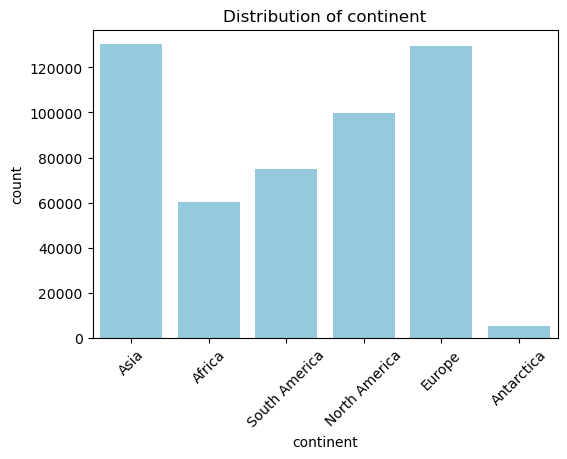

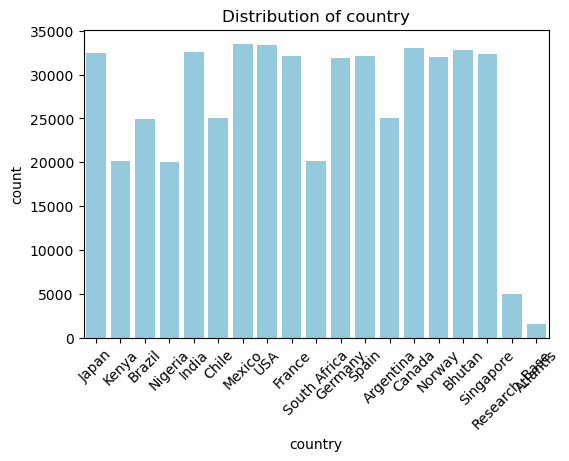

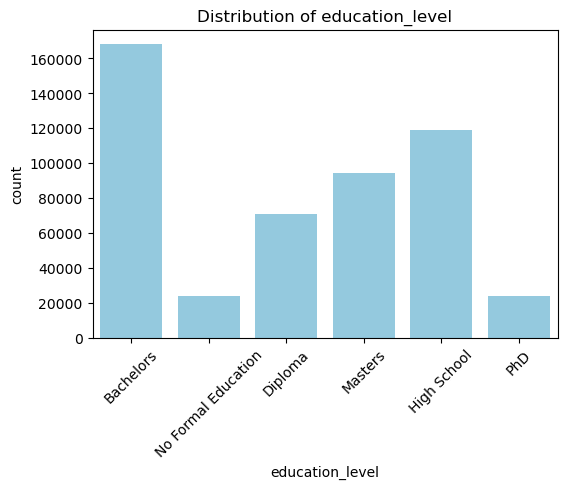

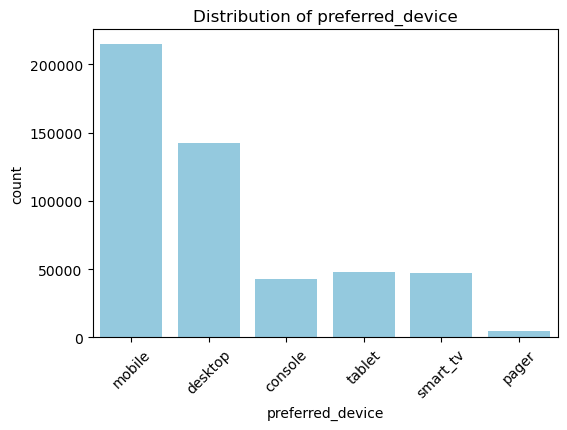

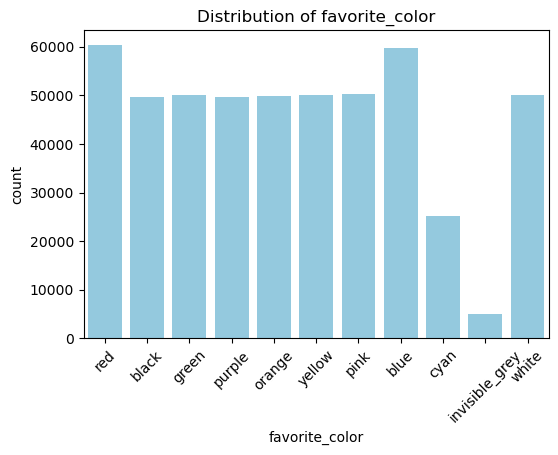

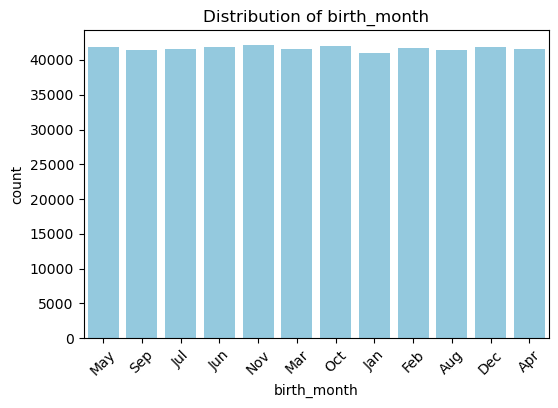

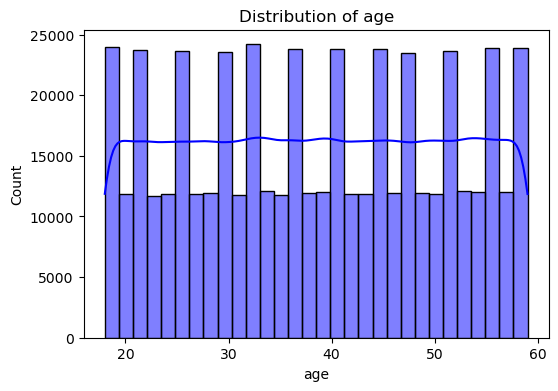

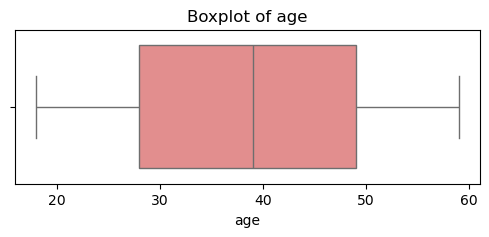

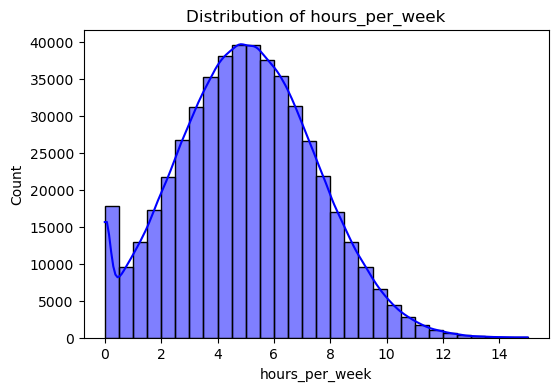

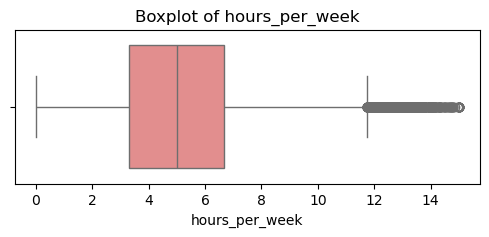

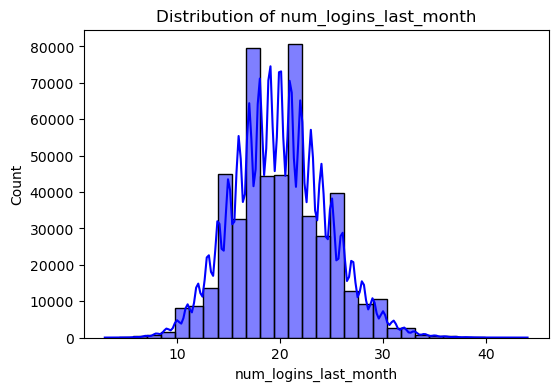

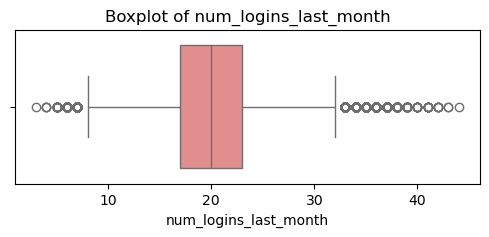

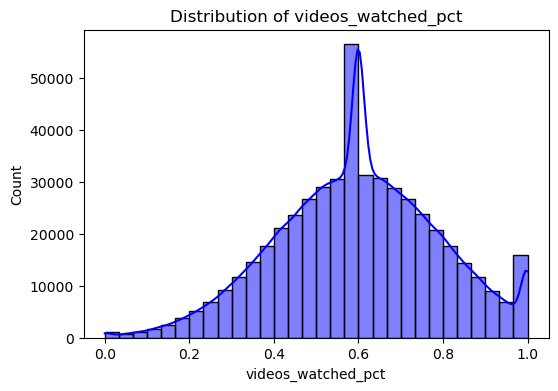

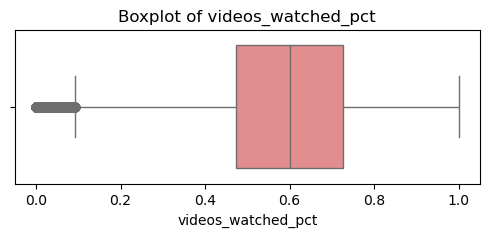

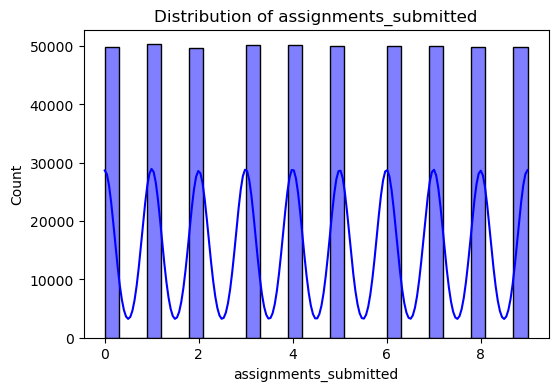

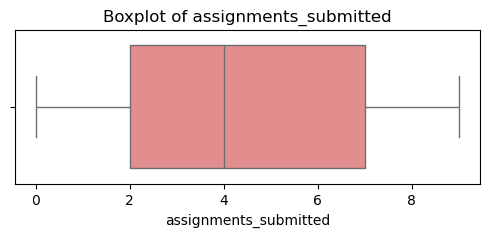

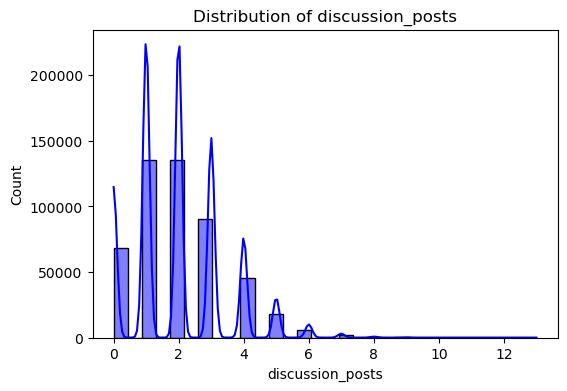

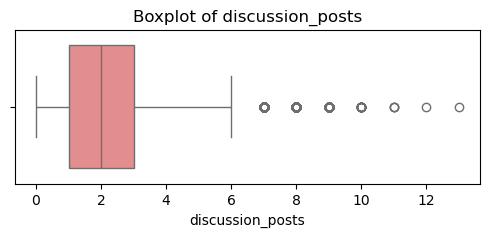

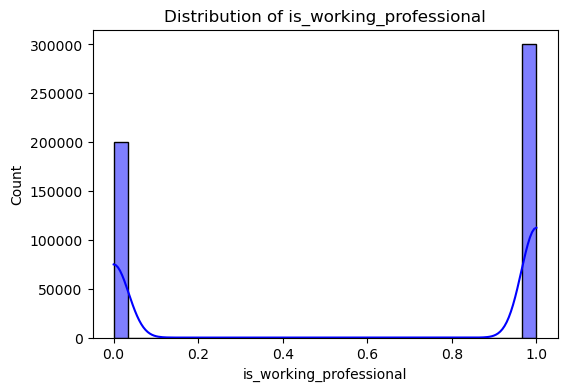

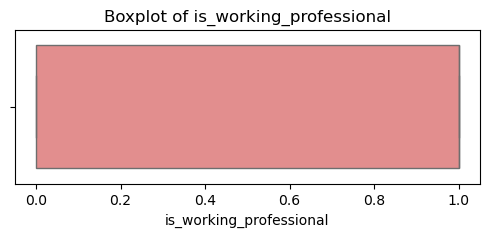

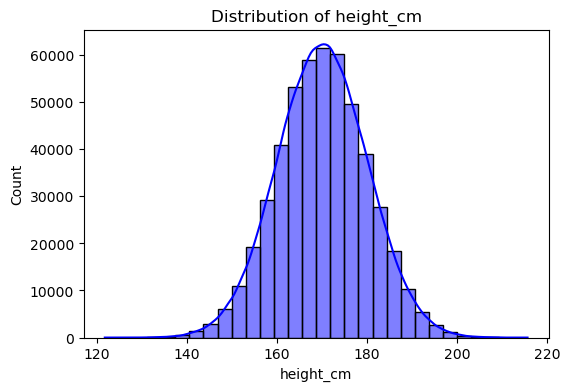

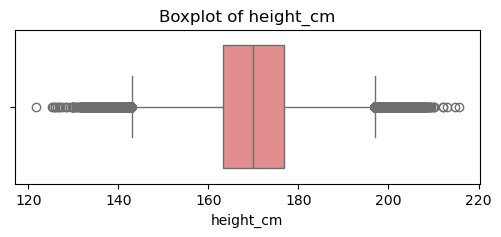

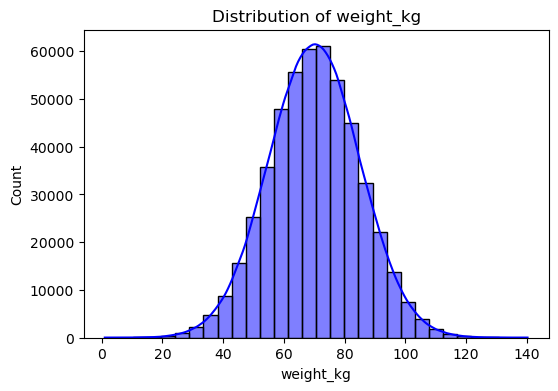

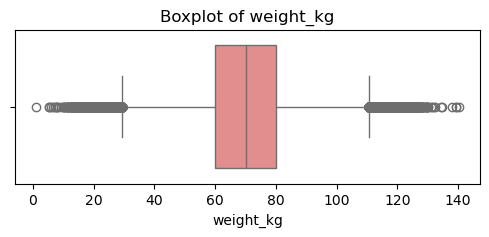

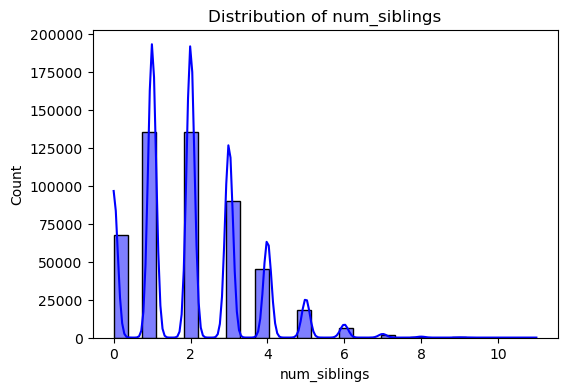

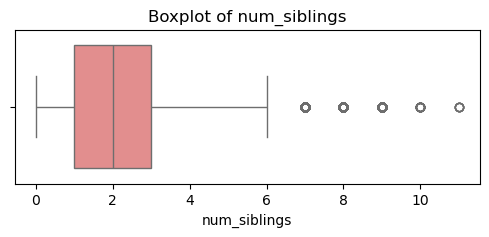

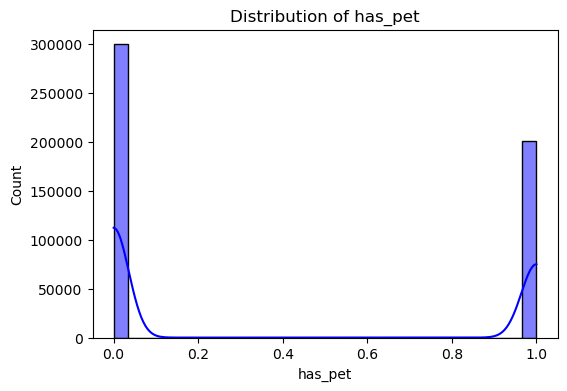

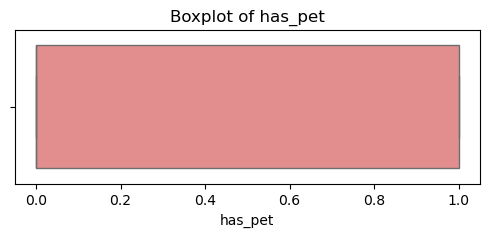

,Lower Bound,Upper Bound,Outlier Count
age,-3.500000,80.500000,0.0
hours_per_week,-1.749912,11.749738,1736.0
num_logins_last_month,8.000000,32.000000,2789.0
videos_watched_pct,0.092335,1.107179,2613.0
assignments_submitted,-5.500000,14.500000,0.0
discussion_posts,-2.000000,6.000000,2300.0
is_working_professional,-1.500000,2.500000,0.0
height_cm,142.950000,196.950000,3513.0
weight_kg,29.350000,110.550000,3430.0
num_siblings,-2.000000,6.000000,2249.0


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Categorical columns (bar plots)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# 2. Numerical columns (histogram + boxplot + outlier summary)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('completed_course')

outlier_summary = {}

for col in numerical_cols:
    # Histogram
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.show()
    
    # Outlier detection (IQR method)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    outlier_summary[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Count": outliers.shape[0]
    }

# Convert dictionary to DataFrame for a clean table
outlier_df = pd.DataFrame(outlier_summary).T
display(outlier_df)

In [30]:
import numpy as np
import pandas as pd

# 5.1 — target & features
target_col = "completed_course"

# sanity checks
assert target_col in df.columns, f"Missing '{target_col}' in columns!"
y = df[target_col]
X = df.drop(columns=[target_col])

# check target is binary {0,1}
uniq = pd.Series(sorted(y.unique()))
print("Unique target values:", uniq.tolist())
if not set(uniq).issubset({0,1}):
    raise ValueError("Target isn't binary 0/1. Map it before proceeding.")

# identify column types
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()

print(f"Numeric cols ({len(num_cols)}):", num_cols[:10], "..." if len(num_cols)>10 else "")
print(f"Categorical cols ({len(cat_cols)}):", cat_cols[:10], "..." if len(cat_cols)>10 else "")

Unique target values: [0, 1]
Numeric cols (11): ['age', 'hours_per_week', 'num_logins_last_month', 'videos_watched_pct', 'assignments_submitted', 'discussion_posts', 'is_working_professional', 'height_cm', 'weight_kg', 'num_siblings'] ...
Categorical cols (6): ['continent', 'country', 'education_level', 'preferred_device', 'favorite_color', 'birth_month'] 


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# make editable copies to avoid SettingWithCopy warnings later
X_train = X_train.copy()
X_test  = X_test.copy()

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Train target balance:", y_train.value_counts(normalize=True).round(3).to_dict())
print("Test  target balance:", y_test.value_counts(normalize=True).round(3).to_dict())

Train shape: (400000, 17)  Test shape: (100000, 17)
Train target balance: {0: 0.75, 1: 0.25}
Test  target balance: {0: 0.75, 1: 0.25}


In [34]:
# separate numeric/categorical columns based on X_train types (safeguard in case dtypes shifted)
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object','category','bool']).columns.tolist()

# --- compute fill values from TRAIN only ---
num_medians = X_train[num_cols].median()
if len(cat_cols) > 0:
    cat_modes = X_train[cat_cols].mode(dropna=True).iloc[0]
else:
    cat_modes = pd.Series(dtype=object)

# --- apply to train & test ---
X_train[num_cols] = X_train[num_cols].fillna(num_medians)
X_test[num_cols]  = X_test[num_cols].fillna(num_medians)

if len(cat_cols) > 0:
    X_train[cat_cols] = X_train[cat_cols].fillna(cat_modes)
    X_test[cat_cols]  = X_test[cat_cols].fillna(cat_modes)

# quick verification
train_nulls = X_train.isna().sum().sum()
test_nulls  = X_test.isna().sum().sum()
print(f"Remaining NaNs — train: {train_nulls}, test: {test_nulls}")
print("Numeric medians used:\n", num_medians.head())
if len(cat_cols) > 0:
    print("\nCategorical modes used:\n", cat_modes.head())

Remaining NaNs — train: 0, test: 0
Numeric medians used:
 age                      39.000000
hours_per_week            4.996999
num_logins_last_month    20.000000
videos_watched_pct        0.599735
assignments_submitted     4.000000
dtype: float64

Categorical modes used:
 continent                Asia
country                Mexico
education_level     Bachelors
preferred_device       mobile
favorite_color            red
Name: 0, dtype: object


In [1]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load dataset
df = pd.read_csv("../data/raw/online_course_completion.csv")

# Step 3: Look at first 5 rows
print(df.head())

# Step 4: Shape of dataset
print("Shape of dataset:", df.shape)

# Step 5: Info about columns
print(df.info())

# Step 6: Missing values
print(df.isnull().sum())

# Step 7: Basic statistics for numeric columns
print(df.describe())

# Step 8: Target variable distribution
print(df['completed_course'].value_counts())

   age      continent  country      education_level  hours_per_week  \
0   56           Asia    Japan            Bachelors        9.116071   
1   46         Africa    Kenya  No Formal Education        0.454712   
2   32  South America   Brazil            Bachelors        4.946724   
3   25         Africa  Nigeria            Bachelors        5.053960   
4   38           Asia    India            Bachelors        9.870424   

   num_logins_last_month  videos_watched_pct  assignments_submitted  \
0                     23            0.507679                      7   
1                     19            0.631424                      1   
2                     22            0.424817                      2   
3                     24            0.318874                      3   
4                     28            1.000000                      6   

   discussion_posts  is_working_professional preferred_device  \
0                 1                        1           mobile   
1               

In [3]:
import pandas as pd

# Load raw data
df = pd.read_csv("../data/raw/online_course_completion.csv")

# 1. Drop useless columns
useless_cols = ["height", "weight", "color"]  # example junk
df = df.drop(columns=useless_cols, errors="ignore")

# 2. Handle missing values (fill numeric with median, categorical with mode)
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Quick check
print(df.isna().sum().sum())  # should be 0
df.head()

0


,age,continent,country,education_level,hours_per_week,num_logins_last_month,videos_watched_pct,assignments_submitted,discussion_posts,is_working_professional,preferred_device,completed_course,height_cm,weight_kg,num_siblings,has_pet,favorite_color,birth_month
0,56,Asia,Japan,Bachelors,9.116071,23,0.507679,7,1,1,mobile,0,175.0,54.1,2,0,red,May
1,46,Africa,Kenya,No Formal Education,0.454712,19,0.631424,1,1,1,desktop,0,168.6,57.7,3,0,black,Sep
2,32,South America,Brazil,Bachelors,4.946724,22,0.424817,2,2,0,console,0,176.5,80.2,2,1,green,Jul
3,25,Africa,Nigeria,Bachelors,5.053960,24,0.318874,3,0,1,console,0,185.2,76.3,1,0,purple,Jun
4,38,Asia,India,Bachelors,9.870424,28,1.000000,6,0,0,mobile,1,167.7,76.3,2,0,orange,Nov


In [9]:
# Save cleaned dataset to the processed folder
df.to_csv("../data/processed/online_course_completion_clean.csv", index=False)
print("Cleaned dataset saved!")

Cleaned dataset saved!


In [1]:
import pandas as pd

# Load processed data
data = pd.read_csv('/Users/tamanna/Documents/ML project /Task 1/data/processed/online_course_completion_clean.csv')
data.head()

,age,continent,country,education_level,hours_per_week,num_logins_last_month,videos_watched_pct,assignments_submitted,discussion_posts,is_working_professional,preferred_device,completed_course,height_cm,weight_kg,num_siblings,has_pet,favorite_color,birth_month
0,56,Asia,Japan,Bachelors,9.116071,23,0.507679,7,1,1,mobile,0,175.0,54.1,2,0,red,May
1,46,Africa,Kenya,No Formal Education,0.454712,19,0.631424,1,1,1,desktop,0,168.6,57.7,3,0,black,Sep
2,32,South America,Brazil,Bachelors,4.946724,22,0.424817,2,2,0,console,0,176.5,80.2,2,1,green,Jul
3,25,Africa,Nigeria,Bachelors,5.053960,24,0.318874,3,0,1,console,0,185.2,76.3,1,0,purple,Jun
4,38,Asia,India,Bachelors,9.870424,28,1.000000,6,0,0,mobile,1,167.7,76.3,2,0,orange,Nov
